In [1]:
dataset_dir = r'H:\my_files\my_programs\cat_upscaler\datasets\downscale3_01_05'
import os
hr_folder = os.path.join(dataset_dir, 'hr')
lr_folder = os.path.join(dataset_dir, 'lr')

good_folders=True
for folder in [lr_folder,hr_folder, dataset_dir]:
    if not os.path.isdir(folder):
        print(f'This folder doesnt exist: {folder}')
        good_folders=False
if good_folders:print('Verified good file structure for this dataset')

Verified good file structure for this dataset


In [ ]:
##file count check

lr_files = os.listdir(lr_folder)
hr_files = os.listdir(hr_folder)

if len(lr_files) != len(hr_files):
    print('number of files in hr and lr folders are not equal')

lr_files_are_matched=True
for file_name in lr_files:
    if file_name not in hr_files:
        print(f'{file_name}  exists in lr folder but not in hr folder')
        lr_files_are_matched=False
if lr_files_are_matched:
    print('all LR files have a mathcing HR file')

hr_files_are_matched=True
for file_name in hr_files:
    if file_name not in lr_files:
        print(f'{file_name}  exists in hr folder but not in lr folder')
        hr_files_are_matched=False
if hr_files_are_matched:
    print('all HR files have a mathcing LR file')

all LR files have a mathcing HR file
all HR files have a mathcing LR file


: 

------------------------------------------------------------------------------------------------------------------------------------------------------


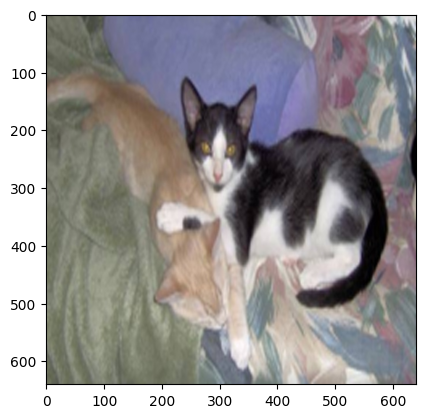

LR^


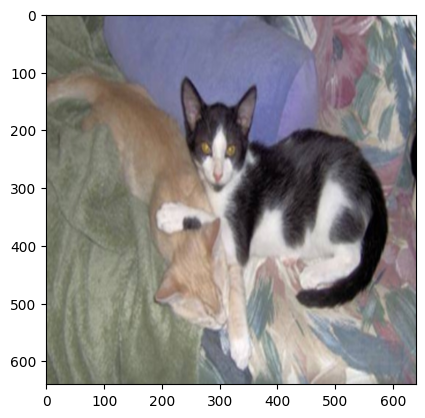

HR^
random_lr_file: dec571e2-b517-49b9-9a4b-946389fb329a.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


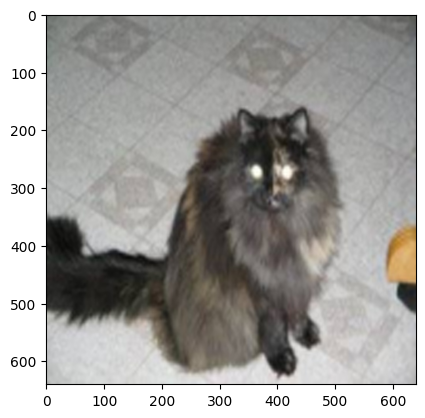

LR^


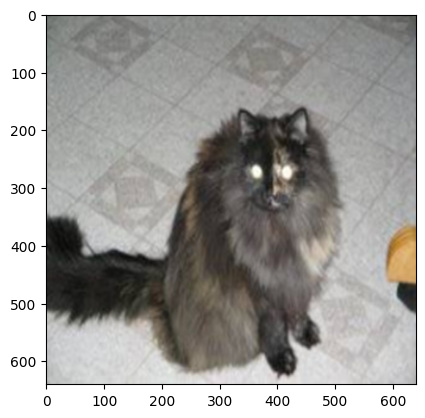

HR^
random_lr_file: bffdca1a-be9f-471c-81f4-a5b2320b2adc.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


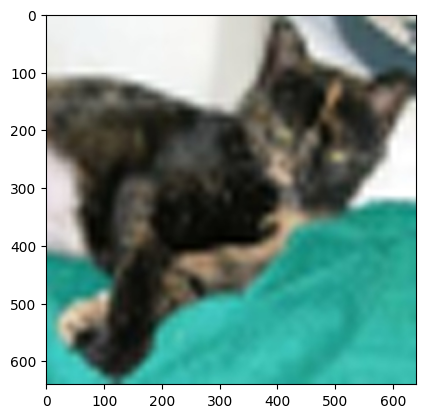

LR^


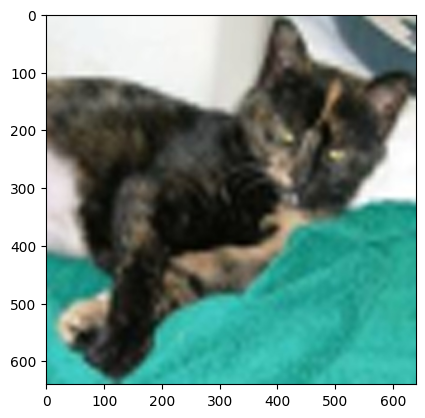

HR^
random_lr_file: f107a34c-9fc7-4cb5-bf4c-f475f98040b8.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


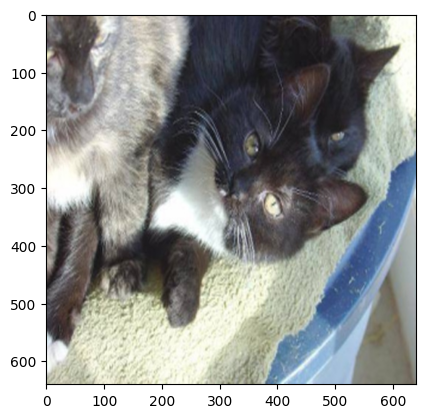

LR^


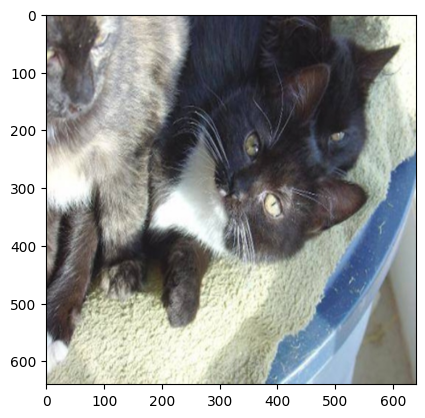

HR^
random_lr_file: 93ddd8d0-50f7-4c5b-be60-d685667ee412.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Do the random comparisons between lr and hr
# files making sure theyre the same base image

import cv2
import matplotlib.pyplot as plt
import random

def show_cv2_image(cv2_image):
    plt.imshow(cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB))
    plt.show()

random_lr_files = random.sample(lr_files, 5)
random_hr_files = random.sample(hr_files, 5)


for random_lr_file in random_lr_files:
    print('---'*50)
    lr_file_path = os.path.join(lr_folder, random_lr_file)
    hr_file_path = os.path.join(hr_folder, random_lr_file)
    lr_image = cv2.imread(lr_file_path)
    hr_image = cv2.imread(hr_file_path)
    show_cv2_image(lr_image)
    print('LR^')
    show_cv2_image(hr_image)
    print('HR^')
    print('random_lr_file:', random_lr_file)
    print('---'*50)




In [ ]:
import cv2
expected_image_width = 1920
expected_image_height = 1080
import time

def progress_printout(good_count,bad_count,total_count,start_time):
    time_seconds_taken = int(time.time() - start_time)
    current_count = good_count + bad_count
    good_percent = (good_count / current_count * 100) if total_count > 0 else 0
    bad_percent = (bad_count / current_count * 100) if current_count > 0 else 0
    current_percent = (current_count / total_count * 100) if total_count > 0 else 0

    out_string = ''
    out_string+=f'\nTime taken: {time_seconds_taken} seconds'
    out_string+=f'\nGood: {good_count} ({good_percent:.2f}%)'
    out_string+=f'\nBad: {bad_count} ({bad_percent:.2f}%)'
    out_string+=f'\nCurrent: {current_count}/{total_count} ({current_percent:.2f}%)\n'
    print(out_string,end='\r')

def get_image_dimensions(file_path):
    image = cv2.imread(file_path)
    dimensions = image.shape
    return dimensions

lr_image_paths = [os.path.join(lr_folder,f ) for f in os.listdir(lr_folder) if f.endswith('.png') or f.endswith('.jpg')]
hr_image_paths = [os.path.join(hr_folder,f ) for f in os.listdir(hr_folder) if f.endswith('.png') or f.endswith('.jpg')]

good_sizes = 0
bad_sizes = 0
size_check_start_time = time.time()

for image_path in lr_image_paths + hr_image_paths:
    dims = get_image_dimensions(image_path)
    if dims[1] != expected_image_width or dims[0] != expected_image_height:
        print(f'Image {image_path} has dimensions {dims} which are not {expected_image_width}x{expected_image_height}')
        bad_sizes+=1
    else:
        good_sizes+=1

    progress_printout(good_sizes,bad_sizes,len(lr_image_paths + hr_image_paths),size_check_start_time)

Image H:\my_files\my_programs\cat_upscaler\datasets\downscale3_01_05\lr\000af574-0f3d-4e2f-beae-024d14d58fb9.jpg has dimensions (640, 640, 3) which are not 1920x1080

Time taken: 0 seconds
Good: 0 (0.00%)
Bad: 1 (100.00%)
Current: 1/10819 (0.01%)
Image H:\my_files\my_programs\cat_upscaler\datasets\downscale3_01_05\lr\00138de4-d192-4ca0-87b1-94d706f17304.jpg has dimensions (640, 640, 3) which are not 1920x1080

Time taken: 0 seconds
Good: 0 (0.00%)
Bad: 2 (100.00%)
Current: 2/10819 (0.02%)
Image H:\my_files\my_programs\cat_upscaler\datasets\downscale3_01_05\lr\00140091-fbd8-4392-aa45-03df1e814c43.jpg has dimensions (640, 640, 3) which are not 1920x1080

Time taken: 0 seconds
Good: 0 (0.00%)
Bad: 3 (100.00%)
Current: 3/10819 (0.03%)
Image H:\my_files\my_programs\cat_upscaler\datasets\downscale3_01_05\lr\001bd52a-1b95-472e-a1a6-5fc27679ee4d.jpg has dimensions (640, 640, 3) which are not 1920x1080

Time taken: 0 seconds
Good: 0 (0.00%)
Bad: 4 (100.00%)
Current: 4/10819 (0.04%)
Image H:\my_